In [1]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 45.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [4]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [5]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [6]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [7]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [8]:
import spacy

In [9]:
nlp = spacy.load('el_core_news_sm')

In [10]:
kath_full_articles_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/tempi-data-analysis/articles.csv/kathimerini_tempi_articles.csv")
kath_full_articles_df

article_url  \
0    https://www.kathimerini.gr/society/563500327/t...   
1    https://www.kathimerini.gr/politics/563500285/...   
2    https://www.kathimerini.gr/politics/563500153/...   
3    https://www.kathimerini.gr/society/563500141/e...   
4    https://www.kathimerini.gr/society/563500075/e...   
..                                                 ...   
205  https://www.kathimerini.gr/society/563437195/t...   
206  https://www.kathimerini.gr/society/reportaz/56...   
207  https://www.kathimerini.gr/society/563437147/s...   
208  https://www.kathimerini.gr/society/563437075/d...   
209  https://www.kathimerini.gr/society/563437057/d...   

                                                 title        date      time  \
0                 Τέμπη: Νέα αυτοψία στη θέση Κουλούρι  2025-03-06  07:10:13   
1    Τα Τέμπη στη Βουλή: Κυβέρνηση υπό πίεση,  ασυν...  2025-03-06  06:56:52   
2    Τέμπη: Αντιπαράθεση στη Βουλή για τα επεισόδια...  2025-03-05  22:57:23   
3    Επεισόδια στη Θεσσαλονίκη: Μολότοφ, χημικά και...  2025-03-05  22:21:36   
4    Τέμπη: Επίθεση με πέτρες στον σταθμό του ΟΣΕ σ...  2025-03-05  21:15:18   
..                                                 ...         ...       ...   
205  Τέμπη – Θεσσαλονίκη: Επεισόδια μετά τη συγκέντ...  2025-01-26  15:16:00   
206      Χιλιάδες διαδηλωτές στο Σύνταγμα για τα Τέμπη  2025-01-26  14:42:46   
207  Σύνταγμα: Επεισόδια μετά τη συγκέντρωση για τα...  2025-01-26  14:22:15   
208  Διαδηλώσεις για τα Τέμπη σε Ελλάδα και εξωτερι...  2025-01-26  13:03:05   
209  Διαδηλώσεις για τα Τέμπη σε πολλές πόλεις της ...  2025-01-26  11:22:12   

      section                                             author  \
0    Κοινωνία                                  Γιάννης Σουλιώτης   
1    Πολιτική  Σταύρος Παπαντωνίου\n\nΑντώνης Αντζολέτος\nΔώρ...   
2    Πολιτική                                           Newsroom   
3    Κοινωνία                                           Newsroom   
4    Κοινωνία                                           Newsroom   
..        ...                                                ...   
205  Κοινωνία                                           Newsroom   
206  Ρεπορτάζ                                   Λουκάς Βελιδάκης   
207  Κοινωνία                                   Λουκάς Βελιδάκης   
208  Κοινωνία                 Λουκάς Βελιδάκης\n\nΣταύρος Τζίμας   
209  Κοινωνία                                           Newsroom   

                                               excerpt  \
0    Παραγγελία προς την Πυροσβεστική από τον ειδικ...   
1    Μητσοτάκης: Δεν το βάζω κάτω – Συμφωνία στο πα...   
2    Βουλευτές του ΠΑΣΟΚ, του ΣΥΡΙΖΑ, του ΚΚΕ, της ...   
3    Οι οδομαχίες σημειώνονται επί της οδού Εγνατία...   
4    Περίπου 20 άτομα με καλυμμένα τα χαρακτηριστικ...   
..                                                 ...   
205                                                NaN   
206  Με κεντρικό σύνθημα «Δικαιοσύνη», η συγκέντρωσ...   
207  Μικρή ομάδα ατόμων επιτέθηκε σε αστυνομικούς π...   
208  Τεράστια κινητοποίηση για την απονομή δικαιοσύ...   
209                                                NaN   

                                             text_body  \
0    Ο ειδικός εφέτης ανακριτής Λάρισας Σωτήρης Μπα...   
1    Σε συνθήκες πολιτικής θύελλας κινείται από χθε...   
2    Αντιπαράθεση, με αφορμή τα επεισόδια στο κέντρ...   
3    Σοβαρά επεισόδια σημειώνονται αυτή την ώρα στη...   
4    Αγνωστοι επιτέθηκαν με πέτρες στον σιδηροδρομι...   
..                                                 ...   
205  Επεισόδια ξέσπασαν στη Θεσσαλονίκη και πιο συγ...   
206  Χιλιάδες πολίτες κατέκλυσαν την πλατεία Συντάγ...   
207  Eπεισόδια σημειώθηκαν μετά τη συγκέντρωση διαμ...   
208  Βουβή διαμαρτυρία πολλών χιλιάδων ανθρώπων εξε...   
209  Δεκάδες συγκεντρώσεις προγραμματίζονται για σή...   

                                         feat_img_link  \
0    https://www.kathimerini.gr/wp-content/uploads/...   
1    https://www.kathimerini.gr/wp-content/uploads/...   


In [11]:
kath_full_articles_df=kath_full_articles_df.drop_duplicates()
kath_full_articles_df

article_url  \
0    https://www.kathimerini.gr/society/563500327/t...   
1    https://www.kathimerini.gr/politics/563500285/...   
2    https://www.kathimerini.gr/politics/563500153/...   
3    https://www.kathimerini.gr/society/563500141/e...   
4    https://www.kathimerini.gr/society/563500075/e...   
..                                                 ...   
205  https://www.kathimerini.gr/society/563437195/t...   
206  https://www.kathimerini.gr/society/reportaz/56...   
207  https://www.kathimerini.gr/society/563437147/s...   
208  https://www.kathimerini.gr/society/563437075/d...   
209  https://www.kathimerini.gr/society/563437057/d...   

                                                 title        date      time  \
0                 Τέμπη: Νέα αυτοψία στη θέση Κουλούρι  2025-03-06  07:10:13   
1    Τα Τέμπη στη Βουλή: Κυβέρνηση υπό πίεση,  ασυν...  2025-03-06  06:56:52   
2    Τέμπη: Αντιπαράθεση στη Βουλή για τα επεισόδια...  2025-03-05  22:57:23   
3    Επεισόδια στη Θεσσαλονίκη: Μολότοφ, χημικά και...  2025-03-05  22:21:36   
4    Τέμπη: Επίθεση με πέτρες στον σταθμό του ΟΣΕ σ...  2025-03-05  21:15:18   
..                                                 ...         ...       ...   
205  Τέμπη – Θεσσαλονίκη: Επεισόδια μετά τη συγκέντ...  2025-01-26  15:16:00   
206      Χιλιάδες διαδηλωτές στο Σύνταγμα για τα Τέμπη  2025-01-26  14:42:46   
207  Σύνταγμα: Επεισόδια μετά τη συγκέντρωση για τα...  2025-01-26  14:22:15   
208  Διαδηλώσεις για τα Τέμπη σε Ελλάδα και εξωτερι...  2025-01-26  13:03:05   
209  Διαδηλώσεις για τα Τέμπη σε πολλές πόλεις της ...  2025-01-26  11:22:12   

      section                                             author  \
0    Κοινωνία                                  Γιάννης Σουλιώτης   
1    Πολιτική  Σταύρος Παπαντωνίου\n\nΑντώνης Αντζολέτος\nΔώρ...   
2    Πολιτική                                           Newsroom   
3    Κοινωνία                                           Newsroom   
4    Κοινωνία                                           Newsroom   
..        ...                                                ...   
205  Κοινωνία                                           Newsroom   
206  Ρεπορτάζ                                   Λουκάς Βελιδάκης   
207  Κοινωνία                                   Λουκάς Βελιδάκης   
208  Κοινωνία                 Λουκάς Βελιδάκης\n\nΣταύρος Τζίμας   
209  Κοινωνία                                           Newsroom   

                                               excerpt  \
0    Παραγγελία προς την Πυροσβεστική από τον ειδικ...   
1    Μητσοτάκης: Δεν το βάζω κάτω – Συμφωνία στο πα...   
2    Βουλευτές του ΠΑΣΟΚ, του ΣΥΡΙΖΑ, του ΚΚΕ, της ...   
3    Οι οδομαχίες σημειώνονται επί της οδού Εγνατία...   
4    Περίπου 20 άτομα με καλυμμένα τα χαρακτηριστικ...   
..                                                 ...   
205                                                NaN   
206  Με κεντρικό σύνθημα «Δικαιοσύνη», η συγκέντρωσ...   
207  Μικρή ομάδα ατόμων επιτέθηκε σε αστυνομικούς π...   
208  Τεράστια κινητοποίηση για την απονομή δικαιοσύ...   
209                                                NaN   

                                             text_body  \
0    Ο ειδικός εφέτης ανακριτής Λάρισας Σωτήρης Μπα...   
1    Σε συνθήκες πολιτικής θύελλας κινείται από χθε...   
2    Αντιπαράθεση, με αφορμή τα επεισόδια στο κέντρ...   
3    Σοβαρά επεισόδια σημειώνονται αυτή την ώρα στη...   
4    Αγνωστοι επιτέθηκαν με πέτρες στον σιδηροδρομι...   
..                                                 ...   
205  Επεισόδια ξέσπασαν στη Θεσσαλονίκη και πιο συγ...   
206  Χιλιάδες πολίτες κατέκλυσαν την πλατεία Συντάγ...   
207  Eπεισόδια σημειώθηκαν μετά τη συγκέντρωση διαμ...   
208  Βουβή διαμαρτυρία πολλών χιλιάδων ανθρώπων εξε...   
209  Δεκάδες συγκεντρώσεις προγραμματίζονται για σή...   

                                         feat_img_link  \
0    https://www.kathimerini.gr/wp-content/uploads/...   
1    https://www.kathimerini.gr/wp-content/uploads/...   


In [12]:
len(kath_full_articles_df)

210

In [13]:
kath_full_articles_df.head()

article_url  \
0  https://www.kathimerini.gr/society/563500327/t...   
1  https://www.kathimerini.gr/politics/563500285/...   
2  https://www.kathimerini.gr/politics/563500153/...   
3  https://www.kathimerini.gr/society/563500141/e...   
4  https://www.kathimerini.gr/society/563500075/e...   

                                               title        date      time  \
0               Τέμπη: Νέα αυτοψία στη θέση Κουλούρι  2025-03-06  07:10:13   
1  Τα Τέμπη στη Βουλή: Κυβέρνηση υπό πίεση,  ασυν...  2025-03-06  06:56:52   
2  Τέμπη: Αντιπαράθεση στη Βουλή για τα επεισόδια...  2025-03-05  22:57:23   
3  Επεισόδια στη Θεσσαλονίκη: Μολότοφ, χημικά και...  2025-03-05  22:21:36   
4  Τέμπη: Επίθεση με πέτρες στον σταθμό του ΟΣΕ σ...  2025-03-05  21:15:18   

    section                                             author  \
0  Κοινωνία                                  Γιάννης Σουλιώτης   
1  Πολιτική  Σταύρος Παπαντωνίου\n\nΑντώνης Αντζολέτος\nΔώρ...   
2  Πολιτική                                           Newsroom   
3  Κοινωνία                                           Newsroom   
4  Κοινωνία                                           Newsroom   

                                             excerpt  \
0  Παραγγελία προς την Πυροσβεστική από τον ειδικ...   
1  Μητσοτάκης: Δεν το βάζω κάτω – Συμφωνία στο πα...   
2  Βουλευτές του ΠΑΣΟΚ, του ΣΥΡΙΖΑ, του ΚΚΕ, της ...   
3  Οι οδομαχίες σημειώνονται επί της οδού Εγνατία...   
4  Περίπου 20 άτομα με καλυμμένα τα χαρακτηριστικ...   

                                           text_body  \
0  Ο ειδικός εφέτης ανακριτής Λάρισας Σωτήρης Μπα...   
1  Σε συνθήκες πολιτικής θύελλας κινείται από χθε...   
2  Αντιπαράθεση, με αφορμή τα επεισόδια στο κέντρ...   
3  Σοβαρά επεισόδια σημειώνονται αυτή την ώρα στη...   
4  Αγνωστοι επιτέθηκαν με πέτρες στον σιδηροδρομι...   

                                       feat_img_link   feat_img_cation  
0  https://www.kathimerini.gr/wp-content/uploads/...     [INTIME NEWS]  
1  https://www.kathimerini.gr/wp-content/uploads/...      Φωτ. ΙΝΤΙΜΕ.  
2  https://www.kathimerini.gr/wp-content/uploads/...            ΙΝΤΙΜΕ  
3  https://www.kathimerini.gr/wp-content/uploads/...               NaN  
4  https://www.kathimerini.gr/wp-content/uploads/...  Φωτ.: Thesstoday

In [14]:
short_kath_fa_df = kath_full_articles_df[['date','text_body' ]]
short_kath_fa_df = short_kath_fa_df.rename(columns={'text_body': 'text'} )
short_kath_fa_df['site']='kathimerini'
short_kath_fa_df

date                                               text  \
0    2025-03-06  Ο ειδικός εφέτης ανακριτής Λάρισας Σωτήρης Μπα...   
1    2025-03-06  Σε συνθήκες πολιτικής θύελλας κινείται από χθε...   
2    2025-03-05  Αντιπαράθεση, με αφορμή τα επεισόδια στο κέντρ...   
3    2025-03-05  Σοβαρά επεισόδια σημειώνονται αυτή την ώρα στη...   
4    2025-03-05  Αγνωστοι επιτέθηκαν με πέτρες στον σιδηροδρομι...   
..          ...                                                ...   
205  2025-01-26  Επεισόδια ξέσπασαν στη Θεσσαλονίκη και πιο συγ...   
206  2025-01-26  Χιλιάδες πολίτες κατέκλυσαν την πλατεία Συντάγ...   
207  2025-01-26  Eπεισόδια σημειώθηκαν μετά τη συγκέντρωση διαμ...   
208  2025-01-26  Βουβή διαμαρτυρία πολλών χιλιάδων ανθρώπων εξε...   
209  2025-01-26  Δεκάδες συγκεντρώσεις προγραμματίζονται για σή...   

            site  
0    kathimerini  
1    kathimerini  
2    kathimerini  
3    kathimerini  
4    kathimerini  
..           ...  
205  kathimerini  
206  kathimerini  
207  kathimerini  
208  kathimerini  
209  kathimerini  

[210 rows x 3 columns]

In [15]:
short_kath_fa_df.tail()

date                                               text  \
205  2025-01-26  Επεισόδια ξέσπασαν στη Θεσσαλονίκη και πιο συγ...   
206  2025-01-26  Χιλιάδες πολίτες κατέκλυσαν την πλατεία Συντάγ...   
207  2025-01-26  Eπεισόδια σημειώθηκαν μετά τη συγκέντρωση διαμ...   
208  2025-01-26  Βουβή διαμαρτυρία πολλών χιλιάδων ανθρώπων εξε...   
209  2025-01-26  Δεκάδες συγκεντρώσεις προγραμματίζονται για σή...   

            site  
205  kathimerini  
206  kathimerini  
207  kathimerini  
208  kathimerini  
209  kathimerini

In [16]:
short_kath_fa_df['date'] = pd.to_datetime(short_kath_fa_df['date'], format='%Y-%m-%d')

In [17]:
short_kath_fa_df.dtypes

date    datetime64[ns]
text            object
site            object
dtype: object

In [18]:
short_kath_fa_df['text'] = short_kath_fa_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

In [19]:
short_kath_fa_df.head()

date                                               text         site
0 2025-03-06  Ο ειδικός εφέτης ανακριτής Λάρισας Σωτήρης Μπα...  kathimerini
1 2025-03-06  Σε συνθήκες πολιτικής θύελλας κινείται από χθε...  kathimerini
2 2025-03-05  Αντιπαράθεση, με αφορμή τα επεισόδια στο κέντρ...  kathimerini
3 2025-03-05  Σοβαρά επεισόδια σημειώνονται αυτή την ώρα στη...  kathimerini
4 2025-03-05  Αγνωστοι επιτέθηκαν με πέτρες στον σιδηροδρομι...  kathimerini

In [20]:
short_kath_fa_df.to_csv('short_kath_fa.csv', index=False)

In [ ]:
from google.colab import files
files.download('short_kath_fa.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [28]:
short_kath_fa_df.dropna(subset=['text'], inplace=True)


In [30]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [32]:
count_vector = cv.fit_transform(short_kath_fa_df['text'])

In [34]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_kath_fa_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

28 φεβρουαρίου  hellenic train  έγκλημα τεμπών  δυστυχήματος τεμπών  \
0               0               0               0                    0   
1               0               1               1                    1   
2               0               0               0                    0   
3               0               0               0                    0   
4               0               0               0                    0   

   δυστύχημα τεμπών  δύο χρόνια  εμπορική αμαξοστοιχία  \
0                 0           1                      0   
1                 0           1                      0   
2                 0           0                      0   
3                 0           0                      0   
4                 0           0                      0   

   εμπορικής αμαξοστοιχίας  εφέτη ανακριτή  κεντρική πλατεία  \
0                        2               0                 0   
1                        0               0                 0   
2                        0               0                 0   
3                        0               0                 0   
4                        0               0                 0   

   κυβερνητικός εκπρόσωπος  κυριάκος μητσοτάκης  προανακριτικής επιτροπής  \
0                        0                    0                         0   
1                        0                    5                         0   
2                        0                    0                         0   
3                        0                    0                         0   
4                        0                    0                         0   

   πρόταση δυσπιστίας  πρότασης δυσπιστίας  σιδηροδρομικό δυστύχημα  \
0                   0                    1                        0   
1                   9                    6                        0   
2                   0                    0                        0   
3                   0                    0                        0   
4                   0                    0                        0   

   συγγενείς θυμάτων  σύσταση προανακριτικής  τραγωδία τεμπών  υπόθεση τεμπών  
0                  0                       0                0               0  
1                  1                       0                1               0  
2                  0                       0                0               0  
3                  0                       0                1               0  
4                  0                       0                0               0

In [35]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['αντιπολίτευση', 'κυβέρνηση', 'έγκλημα', 'συγκάλυψη', 'θύματα', 'δυστύχημα', 'σταθμάρχης','δικαιοσύνη', 'εμπιστοσύνη', 'Βουλή', 'βία'])
count_vector = cv.fit_transform(short_kath_fa_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:1368: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


αντιπολίτευση  κυβέρνηση  έγκλημα  συγκάλυψη  θύματα  δυστύχημα  \
0                0          0        0          1       1          1   
1                5         12        1          2       0          3   
2                0          5        0          1       0          0   
3                0          0        0          0       0          0   
4                0          0        0          0       0          0   
..             ...        ...      ...        ...     ...        ...   
203              0          0        0          0       0          0   
204              0          0        0          0       0          0   
205              0          0        0          0       0          1   
206              0          0        1          0       0          3   
207              0          0        0          0       0          0   

     σταθμάρχης  δικαιοσύνη  εμπιστοσύνη  Βουλή  βία  
0             0           1            0      0    0  
1             0           4            0      0    0  
2             0           0            0      0    4  
3             0           0            0      0    0  
4             0           0            0      0    0  
..          ...         ...          ...    ...  ...  
203           0           0            0      0    0  
204           0           3            0      0    0  
205           0           0            0      0    0  
206           0           1            0      0    0  
207           0           0            0      0    0  

[208 rows x 11 columns]

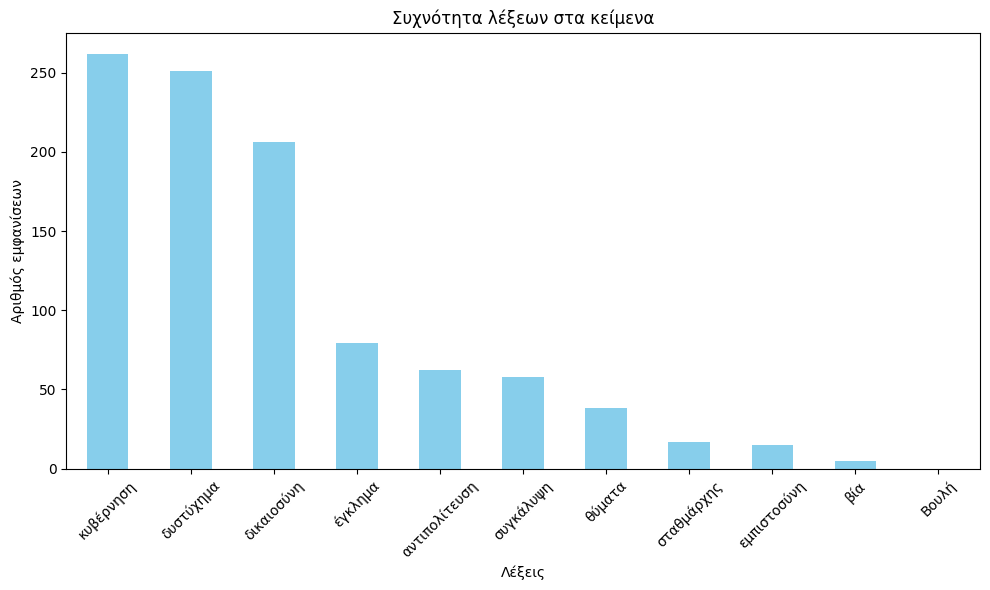

In [36]:
import matplotlib.pyplot as plt

# Υπολογίζουμε τη συνολική συχνότητα κάθε λέξης σε όλα τα κείμενα
word_counts = results.sum().sort_values(ascending=False)

# Φτιάχνουμε το γράφημα
plt.figure(figsize=(10, 6))
word_counts.plot(kind='bar', color='skyblue')
plt.title('Συχνότητα λέξεων στα κείμενα')
plt.ylabel('Αριθμός εμφανίσεων')
plt.xlabel('Λέξεις')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
matrix = vec.fit_transform(short_kath_fa_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [26]:
wordcount_df.shape

(208, 13161)

In [27]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
wordcount_df.tail(1)

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
122      0                0        0    3     0      0     0             0   

     αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
122     0       0  ...                 0               0      0        0   

     κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
122          0          0             0         0        0     0  

[1 rows x 13161 columns]

In [ ]:
wordcount_df[trust_words].sum(axis=1)

0       6
1      75
2      14
3       0
4       4
       ..
118     8
119    34
120     2
121     3
122     9
Length: 123, dtype: int64

In [ ]:
short_kath_fa_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_kath_fa_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_kath_fa_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_kath_fa_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_kath_fa_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_kath_fa_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_kath_fa_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_kath_fa_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_kath_fa_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_kath_fa_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_kath_fa_df

date                                               text  anger  \
0   2025-03-06  Ο ειδικός εφέτης ανακριτής Λάρισας Σωτήρης Μπα...    2.0   
1   2025-03-06  Σε συνθήκες πολιτικής θύελλας κινείται από χθε...   53.0   
2   2025-03-05  Αντιπαράθεση, με αφορμή τα επεισόδια στο κέντρ...   10.0   
4   2025-03-05  Αγνωστοι επιτέθηκαν με πέτρες στον σιδηροδρομι...    0.0   
5   2025-03-05  Πτώση των ποσοστών Ν.Δ. και ΠΑΣΟΚ καθώς και αί...    2.0   
..         ...                                                ...    ...   
199 2025-01-27  Η κυβέρνηση «θα ανταποκριθεί» στα αιτήματα της...    NaN   
200 2025-01-27  Στο δυστύχημα των Τεμπών αναφέρθηκε ο υπουργός...    NaN   
204 2025-01-26  Προ ημερησίας διατάξεως συζήτηση για τα Τέμπη ...    NaN   
207 2025-01-26  Eπεισόδια σημειώθηκαν μετά τη συγκέντρωση διαμ...    NaN   
208 2025-01-26  Βουβή διαμαρτυρία πολλών χιλιάδων ανθρώπων εξε...    NaN   

     positive  joy  disgust  surprise  trust  anticipation  sadness  negative  \
0         7.0  1.0      6.0       3.0    6.0          11.0      4.0      10.0   
1        84.0  9.0     33.0      13.0   75.0          47.0     39.0      94.0   
2        14.0  3.0      8.0       5.0   14.0           2.0     10.0      20.0   
4         6.0  2.0      1.0       5.0    4.0           2.0      4.0       7.0   
5         9.0  1.0      1.0       5.0    3.0           4.0      8.0       9.0   
..        ...  ...      ...       ...    ...           ...      ...       ...   
199       NaN  NaN      NaN       NaN    NaN           NaN      NaN       NaN   
200       NaN  NaN      NaN       NaN    NaN           NaN      NaN       NaN   
204       NaN  NaN      NaN       NaN    NaN           NaN      NaN       NaN   
207       NaN  NaN      NaN       NaN    NaN           NaN      NaN       NaN   
208       NaN  NaN      NaN       NaN    NaN           NaN      NaN       NaN   

     fear  
0     5.0  
1    68.0  
2    15.0  
4     6.0  
5    10.0  
..    ...  
199   NaN  
200   NaN  
204   NaN  
207   NaN  
208   NaN  

[123 rows x 12 columns]

In [ ]:
short_kath_fa_df.dropna(inplace=True)
short_kath_fa_df

date                                               text  anger  \
0   2025-03-06  Ο ειδικός εφέτης ανακριτής Λάρισας Σωτήρης Μπα...    2.0   
1   2025-03-06  Σε συνθήκες πολιτικής θύελλας κινείται από χθε...   53.0   
2   2025-03-05  Αντιπαράθεση, με αφορμή τα επεισόδια στο κέντρ...   10.0   
4   2025-03-05  Αγνωστοι επιτέθηκαν με πέτρες στον σιδηροδρομι...    0.0   
5   2025-03-05  Πτώση των ποσοστών Ν.Δ. και ΠΑΣΟΚ καθώς και αί...    2.0   
..         ...                                                ...    ...   
112 2025-02-18  Συγκέντρωση διαμαρτυρίας για τα Τέμπη διεξήχθη...    9.0   
113 2025-02-17  Νέα δεδομένα έρχονται στο προσκήνιο σχετικά με...   22.0   
114 2025-02-16  «Όσο είναι πρωθυπουργός, δεν θα μάθουμε ποτέ τ...    6.0   
117 2025-02-15  Αρχεία ήχου από τις εγκαταστάσεις όχι μόνο του...   17.0   
122 2025-02-13  Στην άσκηση δύο πειθαρχικών διώξεων έχει προχω...    9.0   

     positive   joy  disgust  surprise  trust  anticipation  sadness  \
0         7.0   1.0      6.0       3.0    6.0          11.0      4.0   
1        84.0   9.0     33.0      13.0   75.0          47.0     39.0   
2        14.0   3.0      8.0       5.0   14.0           2.0     10.0   
4         6.0   2.0      1.0       5.0    4.0           2.0      4.0   
5         9.0   1.0      1.0       5.0    3.0           4.0      8.0   
..        ...   ...      ...       ...    ...           ...      ...   
112      13.0   1.0      3.0       5.0    9.0           4.0      8.0   
113      39.0  11.0     13.0      14.0   27.0          15.0     18.0   
114      18.0   4.0      4.0       1.0   15.0           6.0      9.0   
117      36.0   7.0     14.0      14.0   16.0          17.0     17.0   
122      17.0   1.0      7.0       3.0    9.0          10.0      9.0   

     negative  fear  
0        10.0   5.0  
1        94.0  68.0  
2        20.0  15.0  
4         7.0   6.0  
5         9.0  10.0  
..        ...   ...  
112      16.0   9.0  
113      38.0  17.0  
114      17.0  10.0  
117      44.0  25.0  
122      19.0  10.0  

[74 rows x 12 columns]

In [ ]:
short_kath_fa_df.reset_index(inplace=True)
short_kath_fa_df.set_index('date', inplace=True)
short_kath_fa_df

index                                               text  anger  \
date                                                                          
2025-03-06      0  Ο ειδικός εφέτης ανακριτής Λάρισας Σωτήρης Μπα...    2.0   
2025-03-06      1  Σε συνθήκες πολιτικής θύελλας κινείται από χθε...   53.0   
2025-03-05      2  Αντιπαράθεση, με αφορμή τα επεισόδια στο κέντρ...   10.0   
2025-03-05      4  Αγνωστοι επιτέθηκαν με πέτρες στον σιδηροδρομι...    0.0   
2025-03-05      5  Πτώση των ποσοστών Ν.Δ. και ΠΑΣΟΚ καθώς και αί...    2.0   
...           ...                                                ...    ...   
2025-02-18    112  Συγκέντρωση διαμαρτυρίας για τα Τέμπη διεξήχθη...    9.0   
2025-02-17    113  Νέα δεδομένα έρχονται στο προσκήνιο σχετικά με...   22.0   
2025-02-16    114  «Όσο είναι πρωθυπουργός, δεν θα μάθουμε ποτέ τ...    6.0   
2025-02-15    117  Αρχεία ήχου από τις εγκαταστάσεις όχι μόνο του...   17.0   
2025-02-13    122  Στην άσκηση δύο πειθαρχικών διώξεων έχει προχω...    9.0   

            positive   joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                          
2025-03-06       7.0   1.0      6.0       3.0    6.0          11.0      4.0   
2025-03-06      84.0   9.0     33.0      13.0   75.0          47.0     39.0   
2025-03-05      14.0   3.0      8.0       5.0   14.0           2.0     10.0   
2025-03-05       6.0   2.0      1.0       5.0    4.0           2.0      4.0   
2025-03-05       9.0   1.0      1.0       5.0    3.0           4.0      8.0   
...              ...   ...      ...       ...    ...           ...      ...   
2025-02-18      13.0   1.0      3.0       5.0    9.0           4.0      8.0   
2025-02-17      39.0  11.0     13.0      14.0   27.0          15.0     18.0   
2025-02-16      18.0   4.0      4.0       1.0   15.0           6.0      9.0   
2025-02-15      36.0   7.0     14.0      14.0   16.0          17.0     17.0   
2025-02-13      17.0   1.0      7.0       3.0    9.0          10.0      9.0   

            negative  fear  
date                        
2025-03-06      10.0   5.0  
2025-03-06      94.0  68.0  
2025-03-05      20.0  15.0  
2025-03-05       7.0   6.0  
2025-03-05       9.0  10.0  
...              ...   ...  
2025-02-18      16.0   9.0  
2025-02-17      38.0  17.0  
2025-02-16      17.0  10.0  
2025-02-15      44.0  25.0  
2025-02-13      19.0  10.0  

[74 rows x 12 columns]

<Axes: xlabel='date'>

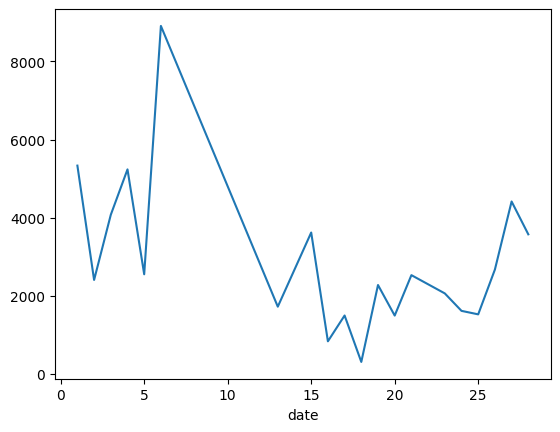

In [ ]:
short_kath_fa_df['text'].str.len().groupby(by=short_kath_fa_df.index.day).mean().plot()

<Axes: xlabel='date'>

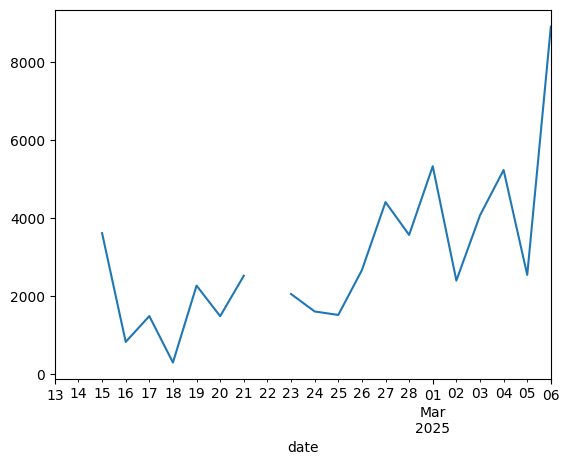

In [ ]:
short_kath_fa_df['text'].str.len().resample('D').mean().plot()

<Axes: ylabel='date'>

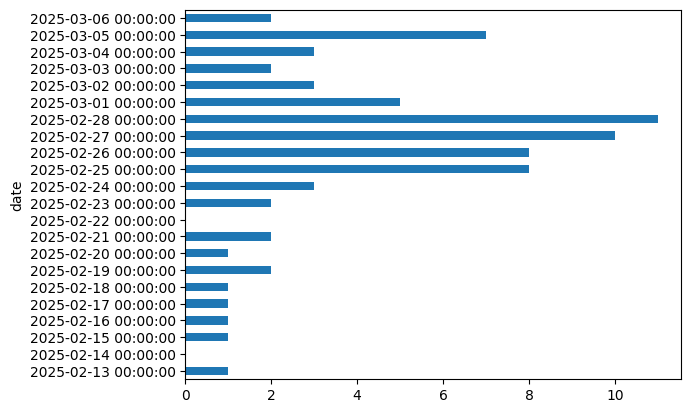

In [ ]:
short_kath_fa_df['text'].resample('D').count().plot(kind='barh')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
plt.style.use('seaborn-v0_8-bright')

<ipython-input-45-1486056874>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  short_kath_fa_df.fillna(method='ffill', inplace=True)


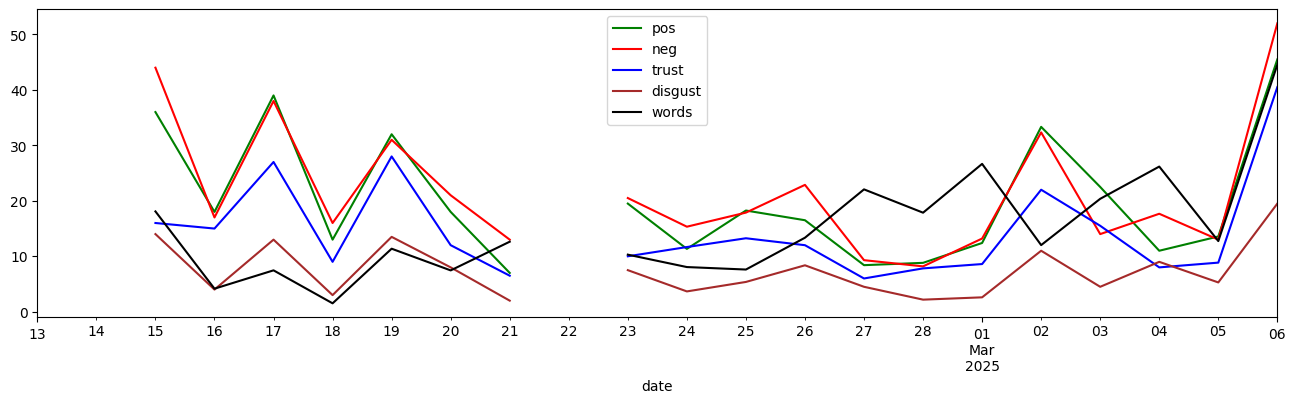

In [ ]:
ax = short_kath_fa_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_kath_fa_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_kath_fa_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_kath_fa_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_kath_fa_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()
short_kath_fa_df.fillna(method='ffill', inplace=True)

In [ ]:
plt.style.use('ggplot')

<ipython-input-47-1486056874>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  short_kath_fa_df.fillna(method='ffill', inplace=True)


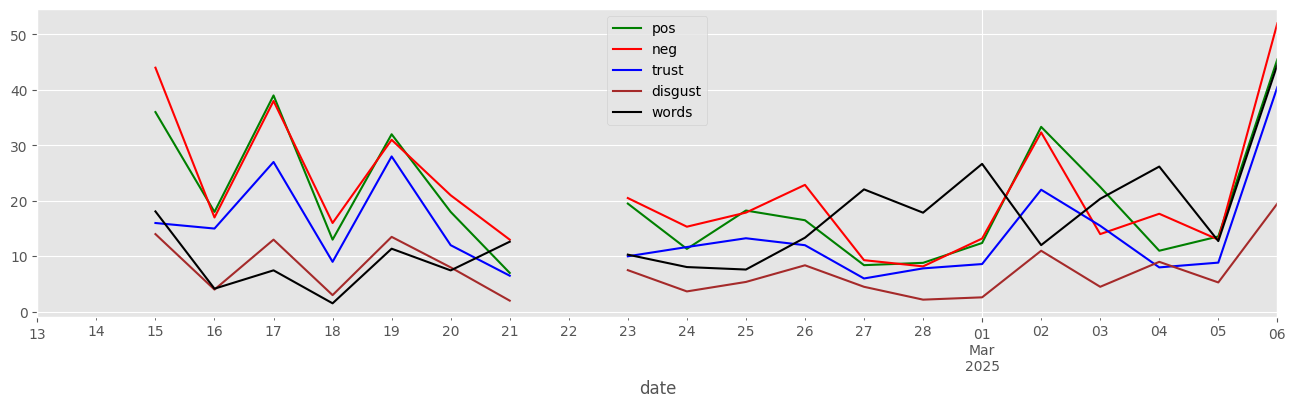

In [ ]:
ax = short_kath_fa_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_kath_fa_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_kath_fa_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_kath_fa_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_kath_fa_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()
short_kath_fa_df.fillna(method='ffill', inplace=True)

In [ ]:
plt.style.use('classic')

<ipython-input-49-1486056874>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  short_kath_fa_df.fillna(method='ffill', inplace=True)


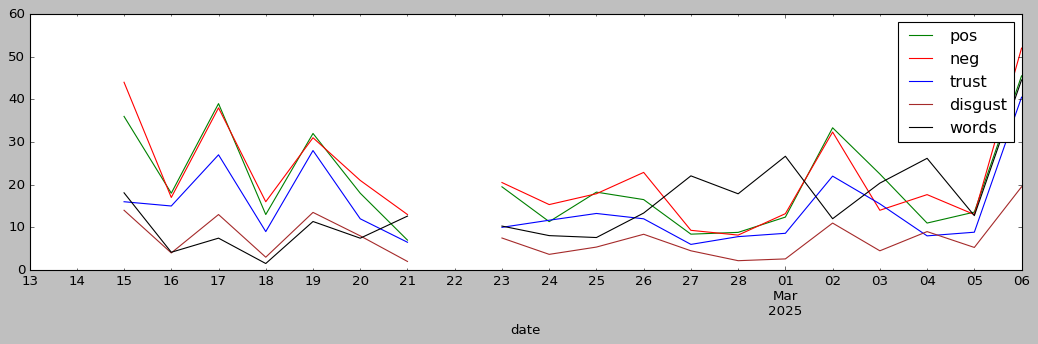

In [ ]:
ax = short_kath_fa_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_kath_fa_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_kath_fa_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_kath_fa_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_kath_fa_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()
short_kath_fa_df.fillna(method='ffill', inplace=True)

In [ ]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

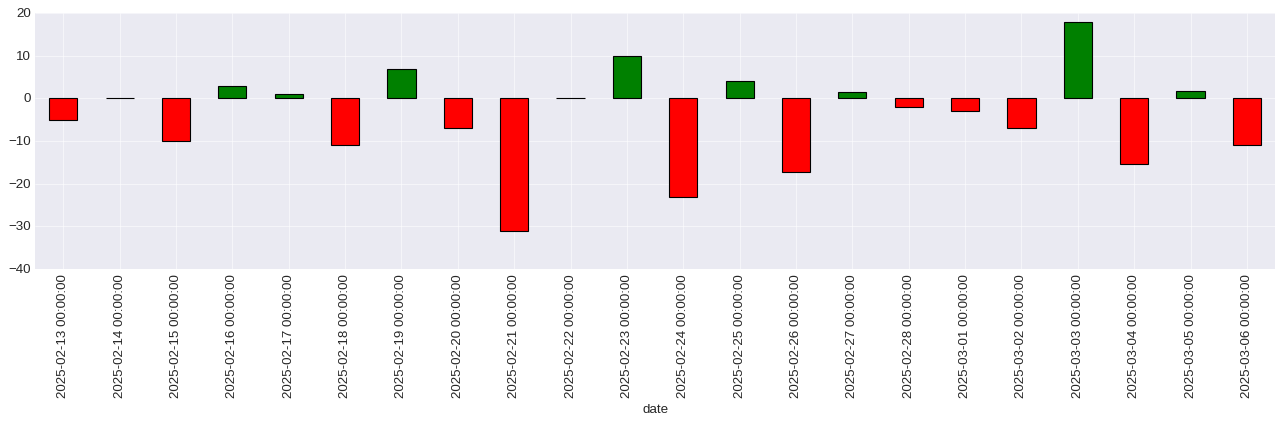

In [ ]:
short_kath_fa_df['(-)αρνητικότητα | θετικότητα(+)'] = short_kath_fa_df.positive*100//short_kath_fa_df[['positive','negative']].sum(
        axis=1) - short_kath_fa_df.negative*100//short_kath_fa_df[['positive','negative']].sum(axis=1)

short_kath_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_kath_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(20,4))